# Sentiment Analysis of Tweets


### Introduction

The project is interested in the sentiment analysis of tweets. Sentiment analysis determines whether a text contains negative, positive, or neutral emotions. It’s a form of text analytics that uses natural language processing (NLP) and machine learning. Most companies use sentiment analysis in customer feedback to understand customer needs, and nowadays it has become simpler, easier, and faster with the development of AI, machines, and deep learning.

The purpose of the study is to create and test a model which is capable of understanding the sentiment of shared tweets. For this purpose, firstly data is visualized, then preprocess procedures are implemented. After the preprocessing, different models are trained. Finally, models are tested and compared among them. Moreover, the best model, which has the highest accuracy rate, is tested with tweets accessed from Twitter API.

### Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn import preprocessing
import nltk

### Data Description and Visualization

The dataset was taken from Kaggle and is used to understand sentiment about shared tweets. While doing that, preprocessing and visualization techniques like histogram, word clouds, and plots were used. Also, model-building methods were applied, such as Keras, CatBoots, logistic regression and Naive Bayes algorithm. The best model was selected, and the data obtained using 'tweepy,' a library for accessing the Twitter API, was tested at the model.

In [2]:
data = pd.read_csv("Tweets.csv")
data.head()


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


The data is read using the read_csv() function and 'pandas' library, then the head() function gives the first 5 observations in the dataset.
It contains 4 columns which are textID, text, selected_text, sentiment.

In [3]:
data.describe()


,textID,text,selected_text,sentiment
count,27481,27480,27480,27481
unique,27481,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11118


By using describe() function, the summary of the data is accessed. Count gives the number of observations in each column; for example, there are 27481 textID and sentiment. Unique gives the number of different observations; for instance, there are 3 sentiments which are positive, negative, and neutral. Top gives the observation that is used most frequently. Freq is the number of repetitions of the observation that is used most. For example, 'good' is used 199 times.


In [4]:

data.drop(['selected_text', 'textID'], axis=1, inplace=True)
print(data.head())


                                                text sentiment
0                I`d have responded, if I were going   neutral
1      Sooo SAD I will miss you here in San Diego!!!  negative
2                          my boss is bullying me...  negative
3                     what interview! leave me alone  negative
4   Sons of ****, why couldn`t they put them on t...  negative


By using the drop() function, selected_text, and textID columns are deleted; now, the data contains 2 columns, text and sentiment, that are used to analyze. 

In [5]:
data.isna().sum()
data.dropna(inplace=True)


By using isna() and dropna() functions, NA values were obtained and deleted.

In [6]:
data.describe()


,text,sentiment
count,27480,27480
unique,27480,3
top,"I`d have responded, if I were going",neutral
freq,1,11117


After removing NA values, the summary was investigated again and obtained that there was 1 NA value.

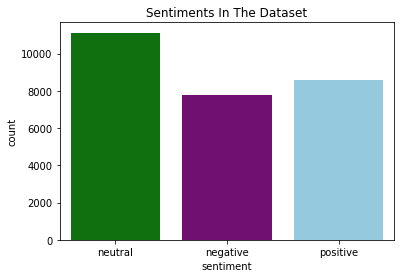

In [7]:
sns.countplot(x ='sentiment', data=data, palette=['green', 'purple', 'skyblue'])
plt.title('Sentiments In The Dataset')
plt.show()

By using the 'seaborn' library, sentiments were grouped, and a graph was created about their counts.
<br>The graph concludes that the number of observations of neutral text is more than positive, and the least number of tweets is negative.

### The relationship between tweet length and sentiment

Using the 'pandas' and 'plotly' library, tweet lengths were found, and the histogram was created. From the histogram, we can conclude that tweet length is not significant effect on sentiment. They have similar shapes and distributions.

In [8]:
#Finding tweet length
tweet_len = pd.Series([len(str(tweet).split()) for tweet in data['text']])
data["Tweet_len"] = tweet_len

import plotly.express as px

fig = px.histogram(data, x='Tweet_len', color='sentiment')
fig.show()




### Word Cloud

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

By using the 'WordCloud' and 'nltk' library, preprocess was applied, and stopwords were removed that are basically a set of commonly used words. Then, word clouds were generated according to different sentiment groups. More repeated words are written bigger and bolder.

For example;<br>
In Positive texts: thank, love, good, happy ...<br>In Negative texts: work, sad, miss, sorry ... <br>In Neutral texts: day, going, date, lol ...

(The Natural Language Toolkit (NLTK) is the library used for building Python programs that work with human language data for applying in statistical natural language processing (NLP). It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.) 

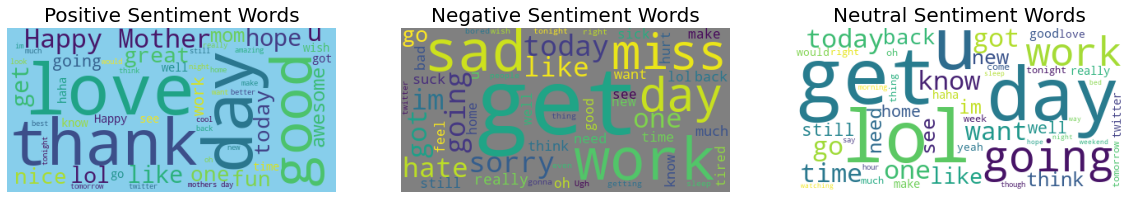

In [9]:

from wordcloud import WordCloud
from nltk.corpus import stopwords

def wordcount_gen(data, sentiment, color):

    # Combine all tweets
    tweets = " ".join([tweet for tweet in data[data.sentiment==sentiment]['text']])
                          
    # Initialize wordcloud object
    wc = WordCloud(background_color= color, 
                   max_words=50, 
                   stopwords = stopwords.words('english'))

    # Generate and plot wordcloud

    plt.imshow(wc.generate(tweets))
    plt.title('{} Sentiment Words'.format(sentiment).title(), fontsize=20)
    plt.axis('off')
    
# Positive tweet words
plt.figure(figsize=[20,20])
plt.subplot(131)
wordcount_gen(data, 'positive', 'skyblue')
     
# Negative tweet words
plt.subplot(132)
wordcount_gen(data, 'negative','grey')
     
# Neutral tweet words
plt.subplot(133)
wordcount_gen(data, 'neutral','white')

### Data Preprocess for Model Building

By using the 'nltk' library, preprocessing is applied for texts, and cleaned_text was obtained.

The preprocess:<br> Upper cases were translated into lower cases.<br> Punctuations were deleted.<br> The repeated and does not affect on meaning words were removed, such as 'I'. <br> Texts were split into words.<br> PorterStemmer was applied.

PorterStemmer: A process for removing the commoner morphological and inflexional endings from words in English

In [10]:
import string
from nltk.stem.porter import *
stop_words = stopwords.words('english')

lower = str.maketrans("ABCÇDEFGĞHIİJKLMNOÖPRŞSTUÜVYZXWQ", "abcçdefgğhiijklmnoöprşstuüvyzxwq")
def clean_string(text):
    text = text.replace("-", " ")
    text = ''.join([word for word in text if word not in string.punctuation] )
    text = ''.join([word for word in text if word not in ["“","”"]])
    text = ''.join([word for word in text if word not in ["I"]])
    text = text.translate(lower)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    words = [PorterStemmer().stem(w) for w in words]
    return words


data1 = data['text'].values.tolist()
cleaned_text = list(map(clean_string,data1))
cleaned_text[:5]
data['clean_text'] = cleaned_text
data.head()




,text,sentiment,Tweet_len,clean_text
0,"I`d have responded, if I were going",neutral,7.0,"[respond, go]"
1,Sooo SAD I will miss you here in San Diego!!!,negative,10.0,"[sooo, sad, miss, san, diego]"
2,my boss is bullying me...,negative,5.0,"[boss, bulli]"
3,what interview! leave me alone,negative,5.0,"[interview, leav, alon]"
4,"Sons of ****, why couldn`t they put them on t...",negative,14.0,"[son, couldnt, put, releas, alreadi, bought]"


Cleaned_text was added to the dataset.

Then, by using the 'Counter' library, the most repeated words were ordered in data frame format grouped by sentiment. <br> 
The data frames and word clouds have similar results.

In [11]:
from collections import Counter
top = Counter([item for sublist in data[data['sentiment']=='positive']['clean_text'] for item in sublist])
top_pos = pd.DataFrame(top.most_common(10), columns=['Common Words', 'Count'])
top_pos.style.background_gradient(cmap='Greens')


,Common Words,Count
0,day,1340
1,love,1138
2,good,1057
3,happi,852
4,thank,817
5,mother,672
6,go,573
7,hope,520
8,like,482
9,great,481


In [12]:
top = Counter([item for sublist in data[data['sentiment']=='negative']['clean_text'] for item in sublist])
top_neg = pd.DataFrame(top.most_common(10), columns=['Common Words', 'Count'])
top_neg.style.background_gradient(cmap='Greys')

,Common Words,Count
0,go,733
1,miss,649
2,get,613
3,work,493
4,like,487
5,im,469
6,dont,469
7,cant,466
8,feel,464
9,day,405


In [13]:
top = Counter([item for sublist in data[data['sentiment']=='neutral']['clean_text'] for item in sublist])
top_neu = pd.DataFrame(top.most_common(10), columns=['Common Words', 'Count'])
top_neu.style.background_gradient(cmap='Oranges')

,Common Words,Count
0,go,1058
1,get,819
2,day,651
3,work,647
4,dont,491
5,like,478
6,time,465
7,got,465
8,lol,457
9,want,448


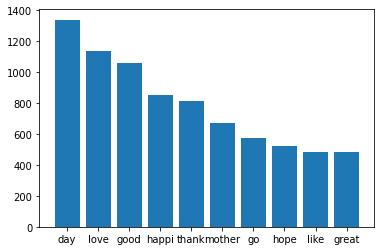

In [14]:
y_pos = np.arange(len(top_pos))
plt.bar(top_pos["Common Words"],top_pos["Count"])
plt.show()


The graph was created about the common words of positive sentiment.

### Keras Model Building

By using the 'keras' library and Tokenizer() function, cleaned_text was transformed to array format (The example was shown below). It provides us with data in the appropriate format to create a model.

What is the Keras? 

Keras is a neural network Application Programming Interface (API) for Python that is tightly integrated with TensorFlow, which is used to build machine learning models.

Positive sides of Keras:

- Keras is very easy and simple. It is a user-friendly API with easy to learn and code feature. It is very simple to start with Deep Learning using Keras.
- Keras does not operate with low-level computations. So, it supports the use of backends. It runs off the top of TensorFlow, Theano, and Microsoft CNTK.
- Keras provides numerous pre-trained models. There are models besides the pre-trained weights. These models help users to simplify their tasks.

Definition of Tokenization:

Tokenization is the process of exchanging sensitive data for nonsensitive data called "tokens" that can be used in a database or internal system without bringing it into scope.   

In [15]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import tensorflow

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):

    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', data['clean_text'][1])
X, tokenizer = tokenize_pad_sequences(data['clean_text'])
print('After Tokenization & Padding \n', X[1])


Before Tokenization & Padding 
 ['sooo', 'sad', 'miss', 'san', 'diego']
After Tokenization & Padding 
 [ 331   55   20 1196 2121    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


By using 'sklearn' library and train_test_split() function, data is split to train the model with test size 0.2 and validation size 0.25.

- Training Dataset: The sample of data used to fit the model.
- Validation Dataset: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.
- Test Dataset: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

In [16]:
from sklearn.model_selection import train_test_split

y = pd.get_dummies(data['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)



The sequential model is created incrementally via the add() method. Epoch was selected as 20. 

The number of epochs is a hyperparameter that defines the number of times that the learning algorithm will work through the entire training dataset. As the number of epochs increases, more times the weight is changed in the neural network and the curve goes from underfitting to optimal to overfitting curve.

The main idea of Sequential API is simply arranging the Keras layers in a sequential order and so, it is called Sequential API. Most of the ANN also has layers in sequential order and the data flows from one layer to another layer in the given order until the data finally reaches the output layer.


In [17]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

#### Explanation of Layers in the Sequential Model

- Embedding layer enables us to convert each word into a fixed length vector of defined size. The resultant vector is a dense one with having real values instead of just 0’s and 1’s. The fixed length of word vectors helps us to represent words in a better way along with reduced dimensions.
- Conv1d is used when you slide your convolution kernels along 1 dimensions. 
- The 1D Global max pooling block takes a 2-dimensional tensor tensor of size (input size) x (input channels) and computes the maximum of all the (input size) values for each of the (input channels).
- Bidirectional long-short term memory(bi-lstm) is the process of making any neural network o have the sequence information in both directions backwards (future to past) or forward(past to future). 
- The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.
- Dense layer receives input from all neurons of its previous layer. The activation parameter is helpful in applying the element-wise activation function in a dense layer. By default, Linear Activation is used but we altered to softmax.
- Softmax converts a vector of values to a probability distribution.

#### Compile and Train Model 
By using compile() and fit() functions, the model was compiled and trained.Then, it was defined as history.
##### Explanation of compile and train parameters 
- Compile defines the loss function, the optimizer and the metrics.We need a compiled model to train (because training uses the loss function and the optimizer).
- The loss function is used to compute the quantity that the the model should seek to minimize during training. Used as a loss function for multi-class classification model where there are two or more output labels. The output label is assigned one-hot category encoding value in form of 0s and 1.
- An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy.
- Stochastic gradient descent (SGD) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable)
- The batch size is a number of samples processed before the model is updated.


In [18]:
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            160000    
                                                                 
 conv1d (Conv1D)             (None, 50, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 32)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 1

After training process, the confusion matrix was created. 

A confusion matrix is a technique for summarizing the performance of a classification algorithm.

From the confusion matrix below:

948 negative value predicted as a negative<br> 333 negative value predicted as a neutral<br> 62 negative value predicted as a positive

546 neutral value predicted as a negative <br> 1621 neutral value predicted as a neutral <br>  510 neutral value predicted as a positive

68 positive value predicted as a negative <br> 236 positive value predicted as a neutral<br>  1169 positive value predicted as a positive

We can expect a high accuracy value and f1 score because of the correctness of predictions. The confusion matrix gives an idea about them.

172/172 [==============================] - 1s 3ms/step


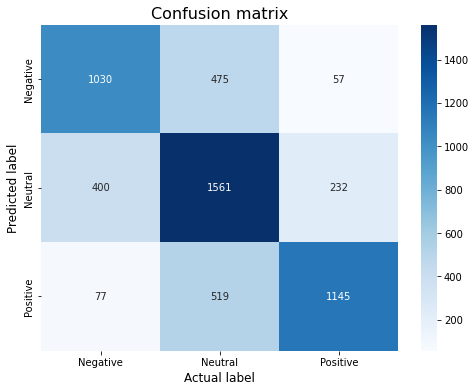

In [19]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

#### Calculating F1 score and evaluating the model on the test set

In [20]:
import keras.backend as K

def f1_score(precision, recall):
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [21]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.6798
Precision : 0.6854
Recall    : 0.6647
F1 Score  : 0.6749


#### Interpretation of model evaluation:

Model accuracy is equal to 0.68, and F1 score is equal to 0.67, which is not low, but it might be improved by;
- Adding new layers while training model 
- Collecting new dataset
- Increasing the number of observation
- Developing preprocess by adding more control points,
- Changing epoch and batch size.

Also, different model techniques can be used, such as CatBoost and logistic regression. In the progress of the analysis they were checked, but the Keras model has the highest accuracy rate among them. Thus, the Keras model was used for prediction.

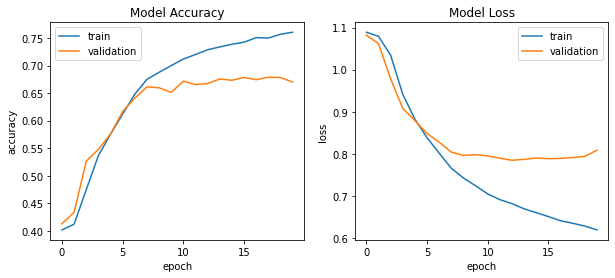

In [22]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

From model accuracy and loss graphs, we can interpret; that when the number of epochs increases, the accuracy increases, and the loss decreases. The model was developed in each epoch.

In [23]:
# Save the model architecture & the weights
model.save('best_model.h5')

By using the save() function the model was saved in h5 format.<br>
The prediction function was defined and tried on four samples.

In [24]:
from keras.models import load_model

# Load model
model = load_model('best_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50
    
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [25]:
predict_class(['"I hate when I have to call and wake people up'])


1/1 [==============================] - 0s 485ms/step
The predicted sentiment is Negative


In [26]:
predict_class(['There is 300 student in city'])


1/1 [==============================] - 0s 17ms/step
The predicted sentiment is Neutral


In [27]:
predict_class(['I am good at basketball'])


1/1 [==============================] - 0s 17ms/step
The predicted sentiment is Positive


#### Accessing Twitter API and Model Testing on Tweets

By using the 'tweepy' library, Twitter API was accessed with consumer key, consumer secret, access token, and access token secret values. Preprocess was applied to tweets. http+, @+ were removed. Searched on 'Trendyol' query.  

In [28]:
import tweepy
import re


consumer_key = 'yourkey'
consumer_secret= 'yourkey'
access_token= 'yourkey'
access_token_secret= 'yourkey'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)


text_query = 'Trendyol'
date_since = '2022-06-10'
n = 10
# Collect tweets
tweets = tweepy.Cursor(api.search_tweets,
              q=text_query,
              lang="en").items(n)

for i in tweets:
    transf = re.sub(r'https?://[^ ]+', '', i.text)
    transf = re.sub(r'@[^ ]+', '', transf)
    transf = re.sub(r' 0 ', 'zero', transf)
    transf = re.sub(r'[^A-Za-z ]', '', transf)
    print(transf)
    predict_class([transf])




 Hi Is it possible to change the language in the app without changing the countryCountry T 
1/1 [==============================] - 0s 14ms/step
The predicted sentiment is Neutral
Monoyachtinge  adet firma logolu kupa bardak  mugs with company logo for Monoyachting  
1/1 [==============================] - 0s 14ms/step
The predicted sentiment is Neutral
Once I got connected to the live chat when choosing that I wasnt satisfied with the bot responses  After having 
1/1 [==============================] - 0s 15ms/step
The predicted sentiment is Negative
When you spend HOURS listing all your remaining problems with deliveries from  and that mail bounces but 
1/1 [==============================] - 0s 14ms/step
The predicted sentiment is Neutral
 u can try other apps getir or trendyol
1/1 [==============================] - 0s 19ms/step
The predicted sentiment is Neutral
     Elbette
1/1 [==============================] - 0s 14ms/step
The predicted sentiment is Neutral
 Or Trendyol Yemek these 

### CatBoost Model

What is the CatBoost?

CatBoost is an algorithm for gradient boosting on decision trees. This algorithm is designed to work with categorical features. Most Machine Learning algorithms require only numerical features for the training process, so If you try to use this dataset “as is” without prior preprocessing, you’ll not be able to do it. You have to convert categorical features’ values into numeric values. Such conversion is called label encoding. But in CatBoost, we don't need such a convert.



In [29]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
y = pd.Series(data['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

clf = CatBoostClassifier(iterations=200, 
                          learning_rate=0.35)
modelcatboost = clf.fit(X_train, y_train)
pred = modelcatboost.predict(X_val)
print(classification_report(y_val,pred,digits=4))


0:	learn: 1.0785586	total: 149ms	remaining: 29.7s
1:	learn: 1.0674926	total: 156ms	remaining: 15.5s
2:	learn: 1.0624613	total: 163ms	remaining: 10.7s
3:	learn: 1.0588131	total: 171ms	remaining: 8.37s
4:	learn: 1.0559393	total: 179ms	remaining: 6.96s
5:	learn: 1.0537472	total: 186ms	remaining: 6.01s
6:	learn: 1.0518643	total: 193ms	remaining: 5.31s
7:	learn: 1.0459479	total: 200ms	remaining: 4.79s
8:	learn: 1.0431989	total: 207ms	remaining: 4.39s
9:	learn: 1.0389264	total: 215ms	remaining: 4.09s
10:	learn: 1.0357072	total: 222ms	remaining: 3.81s
11:	learn: 1.0333673	total: 229ms	remaining: 3.58s
12:	learn: 1.0327112	total: 235ms	remaining: 3.38s
13:	learn: 1.0302089	total: 241ms	remaining: 3.2s
14:	learn: 1.0293450	total: 248ms	remaining: 3.05s
15:	learn: 1.0281357	total: 254ms	remaining: 2.92s
16:	learn: 1.0259979	total: 261ms	remaining: 2.81s
17:	learn: 1.0250848	total: 267ms	remaining: 2.7s
18:	learn: 1.0234745	total: 274ms	remaining: 2.61s
19:	learn: 1.0220314	total: 281ms	remaining

By using 'catboost' library and CatBoostClassifier() function, the model is fitted. We can change learning rate and also number of the iteration. When the number of iterations decreases, the learning rate needs to be increased. By default, the value of the learning rate is defined automatically depending on the number of iterations and the input dataset. Changing the number of iterations to a smaller value is a good starting point for optimization.<br>

With 200 iterations and a 0.35 learning rate, the model has a 0.50 accuracy value; however, in the keras model, we got better results.

### Logistic Regression

In [30]:
from array import array
from sklearn.model_selection import train_test_split
label_mapping={'negative':0, 'neutral':1, 'positive':2}
label=data['sentiment'].values
y = pd.Series(label).map(label_mapping)
y1= y.array

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=1)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)


In [32]:

model = LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [33]:
y_pred = model.predict(X_test)

model.score(x_train, y_train)

0.406886826783115

In [34]:
model.score(X_test, y_test)

0.3535298398835517

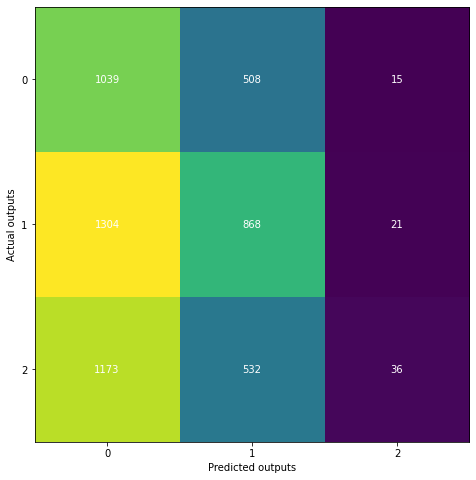

In [35]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=10, color='black')
ax.set_ylabel('Actual outputs', fontsize=10, color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

We can interpret from the confusion matrix, that the accuracy rate is low. Predictions are not good enough.

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.67      0.41      1562
           1       0.45      0.40      0.42      2193
           2       0.50      0.02      0.04      1741

    accuracy                           0.35      5496
   macro avg       0.42      0.36      0.29      5496
weighted avg       0.42      0.35      0.30      5496



From logistic regression, we obtained the lowest accuracy value than other models. It might stem from data and cases. The target label might have no linear correlation with the features. In such cases, logistic regression (or linear regression for regression problems) can’t predict targets with good accuracy (even on the training data). 

In such a case, we can use another model, which might be a decision tree such as CatBoots.

### Naive Bayes Model

In [37]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 32.02328966521107


From Gaussian Naive Bayes Model, we obtained the lowest accuracy value than other models.

### Conclusion

After training and testing models, although all models have different advantages, we can conclude that the Keras model has the highest accuracy rate (0.68) among the other models, which are CatBoost, logistic, and Naive Bayes. However, as mentioned above, the model might be developed with some changes, such as adding new layers while training the model, collecting a new dataset, increasing the number of observations, and developing preprocess by adding more control points. 